In [2]:
import random
import numpy as np
import torch
import torch.utils.data
import glob
import layers
from utils import load_wav_to_torch, load_filepaths_and_text
from text import text_to_sequence
import hparams
import os
import matplotlib.pyplot as plt
from pathlib import Path
hparams = hparams.create_hparams()
import warnings
warnings.filterwarnings('ignore')
import librosa

In [3]:
stft = layers.TacotronSTFT(
            hparams.filter_length, hparams.hop_length, hparams.win_length,
            hparams.n_mel_channels, hparams.sampling_rate, hparams.mel_fmin,
            hparams.mel_fmax)

def get_mel(filename):
    audio, sampling_rate = load_wav_to_torch(filename)
    print('sampling rate: ', sampling_rate)
    if sampling_rate != stft.sampling_rate:
        raise ValueError("{} {} SR doesn't match target {} SR".format(
            sampling_rate, stft.sampling_rate))
    audio_norm = audio
    audio_norm = audio_norm.unsqueeze(0)
    audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
    melspec = stft.mel_spectrogram(audio_norm)
    melspec = torch.squeeze(melspec, 0)
    melspec = melspec.data.numpy()
    return melspec


def save_spec(data, filepath, output_filename):
    if not(os.path.exists(filepath)):
        Path(filepath).mkdir(parents=True)
    np.save(os.path.join(filepath, output_filename), data)

def plot_spectrogram_to_numpy(spectrogram):
    fig, ax = plt.subplots(figsize=(12, 3))
    im = ax.imshow(spectrogram, aspect="auto", origin="lower",
                   interpolation='none')
    plt.colorbar(im, ax=ax)
    plt.xlabel("Frames")
    plt.ylabel("Channels")
    plt.tight_layout()
    plt.show()


sampling rate:  16000
(80, 761)


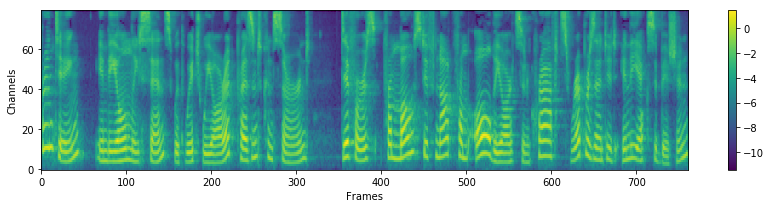

In [4]:
LJ_PATH = '/data3/LJSpeech-1.1/wavs/'
for wav_path in sorted(glob.glob(LJ_PATH + '*.wav')):
    spec = get_mel(wav_path)
    output_filename = wav_path.split('/')[-1].split('.')[0]
    spec_path = Path(wav_path.replace('/LJSpeech-1.1/', '/LJSpeech-1.1-spec/'))
    spec_path = str(spec_path.parent)
    save_spec(spec, spec_path, output_filename)
    print(spec.shape)
    plot_spectrogram_to_numpy(spec)
    break
